In [39]:
# 1. IMPORT LIBRARIES


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

In [40]:
# 2. LOAD REAL-WORLD DATASET


X, y = load_breast_cancer(return_X_y=True)

In [41]:
# 3. TRAIN / TEST SPLIT


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [42]:
# 4. FEATURE SCALING


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# 5. BASELINE MODEL


model = LogisticRegression(
    max_iter=5000,
    solver='liblinear'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [44]:
# 6. CONFUSION MATRIX


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[41  1]
 [ 1 71]]


In [45]:
# 7. CLASSIFICATION METRICS


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 Score: 0.9861111111111112


In [46]:
# 8. CLASSIFICATION REPORT


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



ROC-AUC Score: 0.9957010582010581


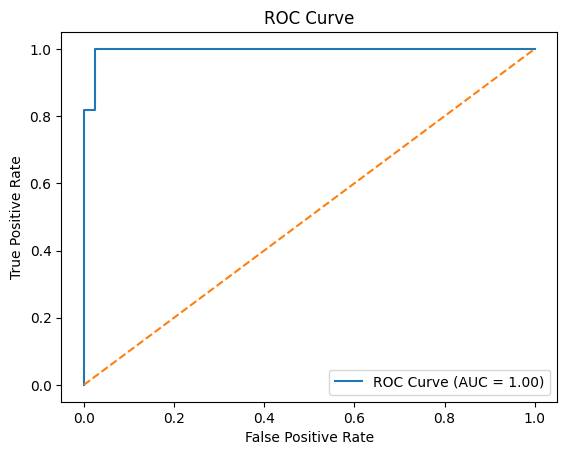

In [47]:
# 9. ROC-AUC & ROC CURVE


auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

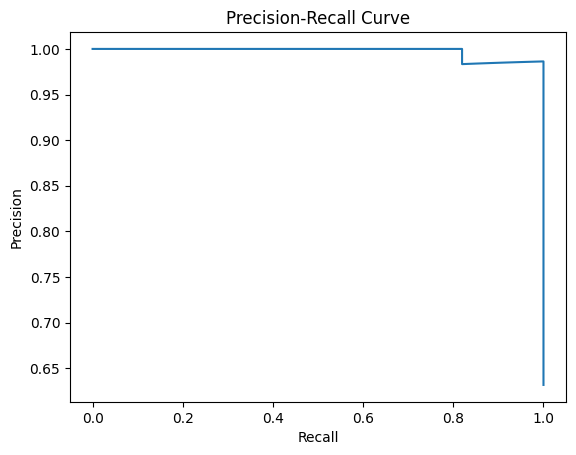

In [48]:
# 10. PRECISION-RECALL CURVE


precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [49]:
# 11. THRESHOLD TUNING (PRODUCTION)


custom_threshold = 0.3
custom_pred = (y_prob >= custom_threshold).astype(int)

print("\nMetrics with Custom Threshold (0.3)")
print("Precision:", precision_score(y_test, custom_pred))
print("Recall:", recall_score(y_test, custom_pred))
print("F1:", f1_score(y_test, custom_pred))


Metrics with Custom Threshold (0.3)
Precision: 0.972972972972973
Recall: 1.0
F1: 0.9863013698630136


In [50]:
# 12. CROSS-VALIDATION


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    model, X, y,
    cv=cv,
    scoring='roc_auc'
)

print("\nCross-Validation ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())






Cross-Validation ROC-AUC Scores: [0.9950868  0.98558795 0.98511905 0.99702381 0.99899396]
Mean CV ROC-AUC: 0.992362313415376


In [51]:
# 13. MODEL COMPARISON


models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=5000, solver='liblinear'))
    ]),
    "Random Forest": RandomForestClassifier(random_state=42)
}




print("\nModel Comparison (ROC-AUC):")
for name, m in models.items():
    score = cross_val_score(m, X, y, cv=5, scoring='roc_auc').mean()
    print(f"{name}: {score:.3f}")


Model Comparison (ROC-AUC):
Logistic Regression: 0.995
Random Forest: 0.991
